In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score,silhouette_score
from scipy.cluster.hierarchy import dendrogram,linkage,cut_tree

In [3]:
data = pd.read_csv("OnlineRetail.csv",encoding="ISO-8859-1")

Download Dataset: [Online Retail](https://www.kaggle.com/code/hellbuoy/online-retail-k-means-hierarchical-clustering/data)

In [4]:
data.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
68057,541851,84685,BEACH HUT KEY CABINET,3,23-01-2011 14:20,3.75,17841.0,United Kingdom
469536,576598,84029E,RED WOOLLY HOTTIE WHITE HEART.,4,15-11-2011 15:05,4.25,13437.0,United Kingdom
171944,551471,85088,CANDY SPOT HAND BAG,2,28-04-2011 16:40,2.10,16370.0,United Kingdom
97342,544599,21155,RED RETROSPOT PEG BAG,3,21-02-2011 18:15,2.55,NaN,United Kingdom
539626,581439,22578,WOODEN STAR CHRISTMAS SCANDINAVIAN,43,08-12-2011 16:30,0.83,NaN,United Kingdom
497015,578347,23344,JUMBO BAG 50'S CHRISTMAS,4,24-11-2011 09:26,4.13,NaN,United Kingdom
142005,548537,90173,NaN,-28,31-03-2011 17:35,0.00,NaN,United Kingdom
406782,571828,22667,RECIPE BOX RETROSPOT,4,19-10-2011 11:52,2.95,16440.0,United Kingdom
264009,560050,23203,JUMBO BAG DOILEY PATTERNS,1,14-07-2011 15:07,2.08,NaN,United Kingdom
522205,580386,21524,DOORMAT SPOTTY HOME SWEET HOME,2,04-12-2011 10:29,8.25,18065.0,United Kingdom


<AxesSubplot:>

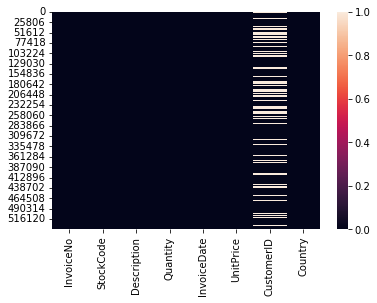

In [5]:
sns.heatmap(data.isnull())

In [6]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
data.dropna(inplace=True)

In [8]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [9]:
data.info() #no null character and we have only 3 numerical data type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [10]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [11]:
data['date'] = pd.to_datetime(data['InvoiceDate'])

In [12]:
data.drop('InvoiceDate',axis=1,inplace=True)

In [13]:
data.head(3)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-01-12 08:26:00
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-01-12 08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-01-12 08:26:00


In [14]:
data.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [15]:
data.UnitPrice.unique()

array([2.55000e+00, 3.39000e+00, 2.75000e+00, 7.65000e+00, 4.25000e+00,
       1.85000e+00, 1.69000e+00, 2.10000e+00, 3.75000e+00, 1.65000e+00,
       4.95000e+00, 9.95000e+00, 5.95000e+00, 7.95000e+00, 8.50000e-01,
       6.50000e-01, 1.25000e+00, 2.95000e+00, 1.95000e+00, 4.20000e-01,
       1.80000e+01, 1.06000e+00, 6.95000e+00, 1.09500e+01, 3.45000e+00,
       5.50000e-01, 3.80000e-01, 1.45000e+00, 3.95000e+00, 6.75000e+00,
       2.75000e+01, 1.49500e+01, 1.69500e+01, 4.65000e+00, 6.45000e+00,
       1.27500e+01, 1.99500e+01, 8.50000e+00, 3.82000e+00, 3.37000e+00,
       5.45000e+00, 6.35000e+00, 7.20000e-01, 6.40000e-01, 1.00000e-01,
       3.20000e-01, 1.48000e+00, 2.90000e-01, 1.65000e+02, 3.57500e+01,
       3.35000e+00, 1.06500e+01, 1.50000e+01, 9.50000e-01, 2.10000e-01,
       1.20000e-01, 2.40000e-01, 3.25000e+00, 1.49000e+00, 2.25000e+00,
       1.55000e+00, 1.89500e+01, 8.95000e+00, 5.00000e+01, 2.99500e+01,
       4.60000e+00, 1.05000e+00, 5.49000e+00, 1.90000e-01, 1.075

Text(0, 0.5, 'Count')

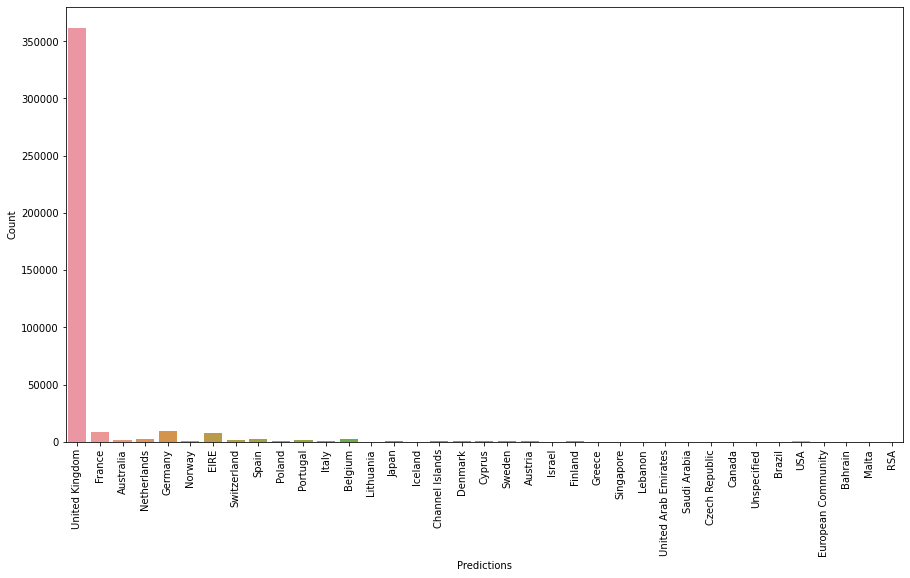

In [16]:
plt.figure(figsize=(15,8))
sns.countplot(data=data,x='Country')
plt.xticks(rotation=90)
plt.xlabel("Predictions")
plt.ylabel("Count")

In [17]:
data.drop_duplicates(keep="first",inplace=True)

In [18]:
data.shape

(401604, 8)

In detailing with Mall Segmentation i.e., Customer Segmentation we shall first deal with RFM analysis

In [33]:
df = data.copy()
df['Revenue'] = data['Quantity'] * data['UnitPrice']

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   UnitPrice    401604 non-null  float64       
 5   CustomerID   401604 non-null  float64       
 6   Country      401604 non-null  object        
 7   date         401604 non-null  datetime64[ns]
 8   Revenue      401604 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 38.7+ MB


In [35]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice',
       'CustomerID', 'Country', 'date', 'Revenue'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


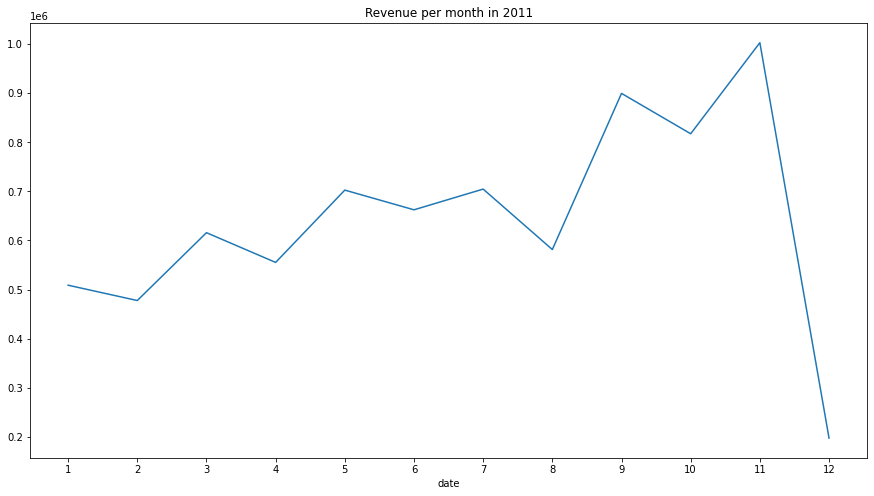

In [39]:
monthly_retail = df[df['date'].dt.year==2011]
monthly_gross = df.groupby(monthly_retail['date'].dt.month).Revenue.sum()

plt.figure(figsize=(15,8))
sns.lineplot(monthly_gross.index,monthly_gross.values)
plt.xticks(range(1,13))
plt.title("Revenue per month in 2011")
plt.show()

In [41]:
freq = df.groupby('CustomerID')['InvoiceNo'].count()
freq = freq.reset_index()
freq.columns = ['CustomerID', 'Frequency']
freq.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [58]:
df['Amount'] = df['Quantity']*df['UnitPrice']
amt = df.groupby('CustomerID')['Amount'].sum()
amt = amt.reset_index()
amt.sample(5)

,CustomerID,Amount
2837,16181.0,305.54
401,12849.0,1010.29
2412,15605.0,1198.23
3608,17242.0,1135.04
2254,15395.0,107.45


In [51]:
original = max(df['date'])
df['Diff'] = max_date - data['date']

In [56]:
diff = df.groupby('CustomerID')['Diff'].min()
diff = diff.reset_index()
diff['Diff'] = diff['Diff'].dt.days

In [59]:
diff.sample(4)

,CustomerID,Diff
3824,17538.0,26
1376,14204.0,151
2481,15695.0,267
283,12689.0,26


In [63]:
dummy = pd.merge(amt,freq, on='CustomerID', how='inner')
rfm_analysis = pd.merge(dummy,diff, on='CustomerID', how='inner')
rfm_analysis.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']

In [64]:
rfm_analysis.sample(10)

,CustomerID,Amount,Frequency,Recency
744,13323.0,787.85,21,22
1504,14383.0,1247.69,59,164
2208,15332.0,1661.06,35,485
1344,14155.0,118.75,6,267
1922,14957.0,58.49,12,253
1929,14964.0,206.21,13,189
1118,13848.0,1255.00,5,123
1741,14698.0,1217.27,200,16
2569,15811.0,2171.32,139,18
3939,17694.0,283.12,15,142


In [65]:
maxminscal = MinMaxScaler()
X = rfm_analysis.drop('CustomerID',axis=1)

In [66]:
X.head(10)

,Amount,Frequency,Recency
0,0.00,2,326
1,4310.00,182,40
2,1797.24,31,76
3,1757.55,73,19
4,334.40,17,311
5,1545.41,95,73
6,89.00,4,204
7,1079.40,58,233
8,459.40,13,96
9,2811.43,59,23


In [67]:
X = maxminscal.fit_transform(X)

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [55.0, 55.0, 65.0, 65.0],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [115.0, 115.0, 132.5, 132.5],
  [165.0, 165.0, 175.0, 175.0],
  [195.0, 195.0, 205.0, 205.0],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [245.0, 245.0, 255.0, 255.0],
  [222.5, 222.5, 250.0, 250.0],
  [200.0, 200.0, 236.25, 236.25],
  [185.0, 185.0, 218.125, 218.125],
  [170.0, 170.0, 201.5625, 201.5625],
  [155.0, 155.0, 185.78125, 185.78125],
  [123.75, 123.75, 170.390625, 170.390625],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [295.0, 295.0, 312.5, 312.5],
  [285.0, 285.0, 303.75, 303.75],
  [275.0, 275.0, 294.375, 294.375],
  [265.0, 265.0, 284.6875, 284.6875],
  [395.0, 395.0, 405.0, 405.0],
  [385.0, 385.0, 400.0, 400.0],
  [375.0, 375.0, 392.5, 392.5],
  [365.0, 365.0, 383.75, 383.75],
  [355.0, 355.0, 374.375, 374.375],
  [425.0, 425.0, 435.0, 

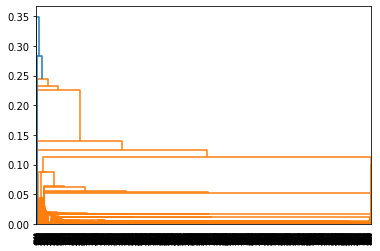

In [69]:
hier = linkage(X, method="single", metric='euclidean')
dendrogram(hier)

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [55.0, 55.0, 65.0, 65.0],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [115.0, 115.0, 132.5, 132.5],
  [165.0, 165.0, 175.0, 175.0],
  [195.0, 195.0, 205.0, 205.0],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [245.0, 245.0, 255.0, 255.0],
  [222.5, 222.5, 250.0, 250.0],
  [200.0, 200.0, 236.25, 236.25],
  [185.0, 185.0, 218.125, 218.125],
  [170.0, 170.0, 201.5625, 201.5625],
  [155.0, 155.0, 185.78125, 185.78125],
  [123.75, 123.75, 170.390625, 170.390625],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [295.0, 295.0, 312.5, 312.5],
  [285.0, 285.0, 303.75, 303.75],
  [275.0, 275.0, 294.375, 294.375],
  [265.0, 265.0, 284.6875, 284.6875],
  [395.0, 395.0, 405.0, 405.0],
  [385.0, 385.0, 400.0, 400.0],
  [375.0, 375.0, 392.5, 392.5],
  [365.0, 365.0, 383.75, 383.75],
  [355.0, 355.0, 374.375, 374.375],
  [425.0, 425.0, 435.0, 

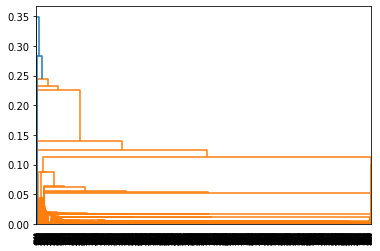

In [73]:
hier = linkage(X, method="single", metric='euclidean')
dendrogram(hier)

In [106]:
cluster_labels = cut_tree(hier,n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

In [108]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
predict = cluster.fit_predict(X)

In [109]:
rfm_analysis['Cluster_Labels'] = cluster.labels_

In [110]:
set(cluster.labels_)  #3 clusters

{0, 1, 2}

In [118]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 500, n_init = 10, random_state = 0)
y_means = km.fit_predict(X)

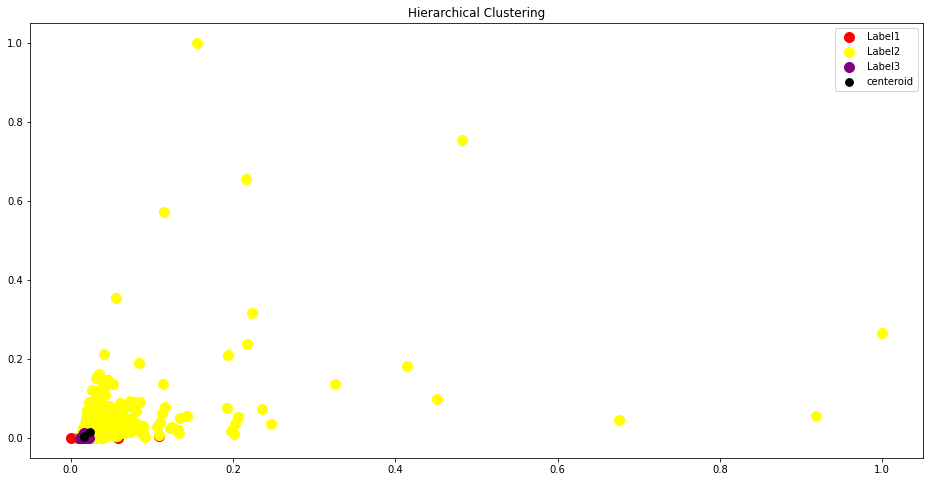

In [119]:
plt.figure(figsize=(16,8))
plt.scatter(X[predict == 0, 0], X[predict == 0, 1], s = 100, color = 'red', label = 'Label1')
plt.scatter(X[predict == 1, 0], X[predict == 1, 1], s = 100, c = 'yellow', label = 'Label2')
plt.scatter(X[predict== 2, 0],  X[predict == 2, 1], s = 100, c = 'purple', label = 'Label3')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 60, c = 'black' , label = 'centeroid')

plt.title('Hierarchical Clustering')
plt.legend()

### Evaluation Metrics       
- adjusted_rand_score
- silhouette_score

Silhouette score is in the range of -1 to 1. A score near 1 denotes the best meaning that the data point i is very compact within the cluster to which it belongs and far away from the other clusters. The worst value is -1. Values near 0 denote overlapping clusters.

In [120]:
silhouette_score(X,predict)

0.6527514233703089

Absolute Rand Score is in the range of 0 to 1. More than 0.9 denotes excellent cluster recovery, above 0.8 is a good recovery. Less than 0.5 is considered to be poor recovery. 

In [123]:
adjusted_rand_score(cluster.labels_,predict)

1.0

Reference:
- [https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/](https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/)
- [https://www.simplilearn.com/tutorials/data-science-tutorial/hierarchical-clustering-in-r](https://www.simplilearn.com/tutorials/data-science-tutorial/hierarchical-clustering-in-r)